# M2.1 - Estadística

# ENTREGABLE ESTADÍSTICA PYTHON

Se nos pidio realizar un informe estadístico completo en formato de cuaderno Jupyter en que se utilizarán los contenidos impartidos en las sesiones realizadas. Nuestro grupo esta compuesto por **Eloy Martinez, Carlos Ferrer y Adriana Campos**.


Las actividades que se pedian eran las siguientes:

1. Elección de datos y breve descripción de su naturaleza.
2. Descriptiva univariante y bivariante de los datos teniendo en cuenta su tipo.
3. Comprobación de la normalidad de alguna/s variable/s del conjunto de datos.
4. Estimación puntual y por intervalos de los parámetros poblacionales de
algunas variables.
5. Realización de contrastes de hipótesis oportunos para realizar inferencia con
los datos
6. Realización de ANOVA (cond. de aplicabilidad, ANOVA, post-hoc) para
obtener conclusiones de los datos.




# 1. Elección de datos y breve descripción de su naturaleza

Los datos seleccionados hacen referencia al gasto mensual de los estudiantes americanos. En el dataset tenemos información acerca de sus estudios, ingresos mensuales y gastos, entre otros. Vamos a hacer un estudio estadístico sobre estos datos para sacar conclusiones.

In [5]:
pip install distfit

**Importamos las librerías esenciales para el análisis***

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats
import random
import math
from distfit import distfit
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


**Leemos el dataset**

In [7]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,22,Female,Senior,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,996,19,Female,Senior,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,997,20,Male,Junior,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App
998,998,22,Non-binary,Senior,Economics,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment App


# 2. Descriptiva univariante y bivariante de los datos teniendo en cuenta su tipo

En este apartado vamos a realizar un análisis descriptivo de las variables para conocer más de cerca los datos que tratamos. 

In [8]:
df.describe()


,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


Vemos que el dataset actual consta de 1.000 lineas. Además, al usar la función describe() podemos ver resultados como la media, la mediana y la varianza, entre otras.

Mostramos una variable categórica. En este ejemplo mostramos en que curso están.

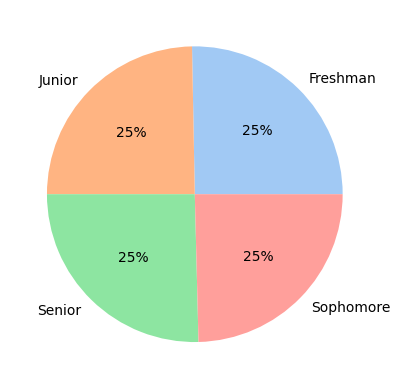

In [9]:
df_year_in_school = df['year_in_school']
df_year_in_school = df_year_in_school.groupby(df_year_in_school).count()

data = df_year_in_school.to_list()
labels = df_year_in_school.index.to_list()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

En esta variable podemos ver que el dataset se preparó de forma que estuvieran equilibradamente repartidos el número de estudiantes por curso.

Mostramos una variable discreta. En este caso mostramos el rango de edades de la muestra.

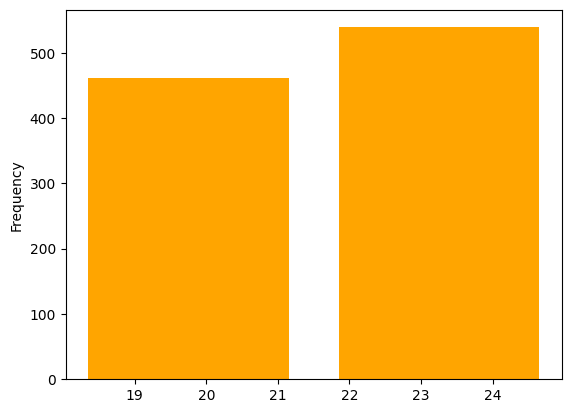

In [10]:
data = df['age'].plot(kind='hist', bins=2, rwidth=0.8, color='orange')

En este dataset, la mayoría de estudiantes tienen entre 22 y 25 años (55%) y el resto, son estudiantes entre 18 y 21 años.

Mostramos una variable continua. En este caso mostramos un gráfico box-whiskers del gasto en comida de los estudiantes.

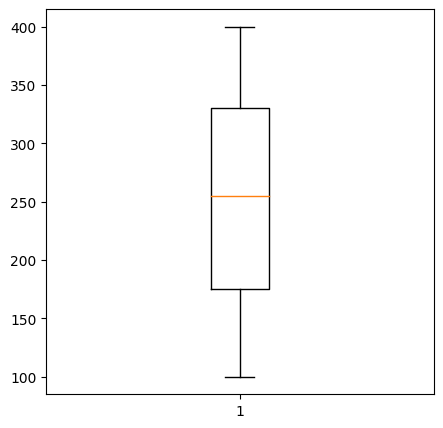

In [11]:
data = df['food'].to_list()

fig = plt.figure(figsize =(5, 5))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

Como podemos observar en este gráfico, la distribución de los datos es simétrica con respecto a la mediana y no tenemos ningún valor atípico que se desvie de la tendencia central.

En este ejemplo no tenemos una variable categórica que tenga un orden.

**Hacemos una descripción bivariante del dataset**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender', 'year_in_school', 'major', 'preferred_payment_method'])

corr_matrix = df_encoded.corr(method='pearson')
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Vamos a comparar los ingresos en función del año que están cursando y añadimos un sesgo de género. 

<Axes: xlabel='year_in_school', ylabel='monthly_income'>

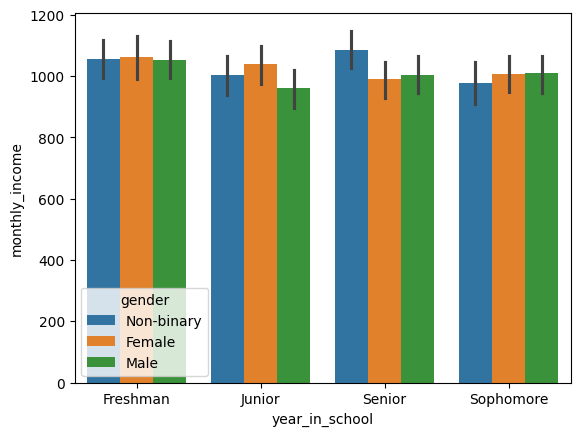

In [13]:
sns.barplot(data=df, x="year_in_school", y="monthly_income", hue="gender")

Podemos observar que los ingresos son bastante similares para todos los años, en cambio, vemos una ligera variación en función del género, pero no sigue ningún patrón en función del año.

<Axes: xlabel='major', ylabel='tuition'>

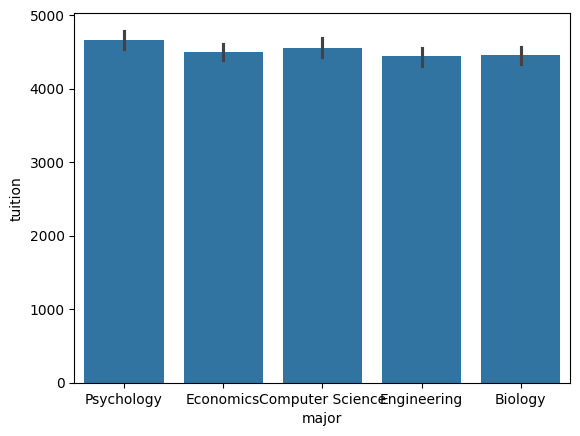

In [14]:
sns.barplot(data=df, x="major", y="tuition")

Aquí podemos observar también que los costes de los grados cursados para estos estudiantes no dependen del grado ya que son todos similares.

[MRDB]: Bien comentado. Simple y sin enrollaros pero completo.

# 3. Normalidad de nuestras variables

In [15]:
# puedes seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric


,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
0,0,19,958,270,5939,709,296,123,188,41,78,134,127,72
1,1,24,1006,875,4908,557,365,85,252,74,92,226,129,68
2,2,24,734,928,3051,666,220,137,99,130,23,239,112,133
3,3,23,617,265,4935,652,289,114,223,99,30,163,105,55
4,4,20,810,522,3887,825,372,168,194,48,71,88,71,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,22,1346,520,3688,969,152,194,151,42,38,252,65,163
996,996,19,1407,560,3380,508,265,52,206,40,98,274,84,135
997,997,20,957,393,3497,723,339,139,69,112,46,284,57,28
998,998,22,1174,612,3649,543,237,123,200,129,90,190,101,65


<Axes: xlabel='monthly_income', ylabel='Count'>

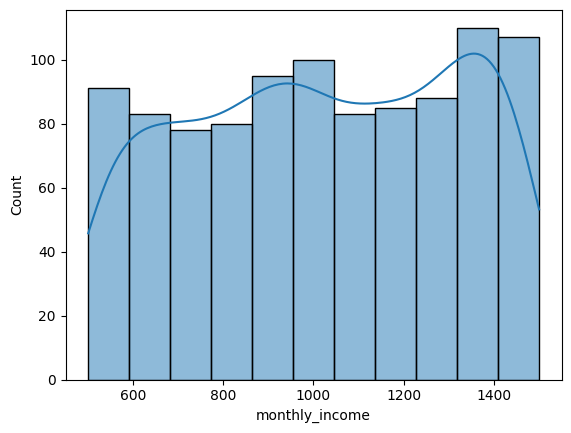

In [16]:
sns.histplot(df['monthly_income'], kde=True)

[MRDB]: Comentarios?

In [17]:
import numpy as np
from distfit import distfit

# Supongamos que tienes un conjunto de datos llamado 'data'
# Reemplaza esto con tus propios datos
data = df['housing'].to_numpy()

# Crear una instancia de la clase distfit
dist = distfit()

# Ajustar automáticamente las distribuciones y seleccionar la mejor
dist.fit_transform(data)

# Obtener la distribución seleccionada
best_distribution = dist.model['name']

print(f'La mejor es: {best_distribution}')


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.02 sec] [RSS: 4.18552e-06] [loc=696.006 scale=171.133]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 7.737e-06] [loc=401.000 scale=295.006]
[distfit] >INFO> [pareto    ] [0.04 sec] [RSS: 7.737e-06] [loc=-68719476335.000 scale=68719476736.000]
[distfit] >INFO> [dweibull  ] [0.10 sec] [RSS: 4.25974e-06] [loc=690.017 scale=164.256]
[distfit] >INFO> [t         ] [0.75 sec] [RSS: 4.18583e-06] [loc=696.008 scale=171.128]
[distfit] >INFO> [genextreme] [0.11 sec] [RSS: 3.49095e-06] [loc=650.578 scale=181.877]
[distfit] >INFO> [gamma     ] [0.12 sec] [RSS: 4.20134e-06] [loc=-6833.299 scale=3.902]
[distfit] >INFO> [lognorm   ] [0.01 sec] [RSS: 4.18556e-06] [loc=-8388207.000 scale=8388903.004]
[distfit] >INFO> [beta      ] [0.11 sec] [RSS: 7.1862e-07] [loc=400.986 scale=599.014]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5.32462e-07] [loc=401.000 scale=599.000]
[distfit] >INFO> [loggamma  ] [0.25 sec] [RSS: 4.11

La mejor es: uniform


In [18]:
print(f'\n - Número de usuarios por edades:')


# Contar el número de personas por edad
conteo_edades = df['age'].value_counts()

# Mostrar el resultado
print(conteo_edades)

# Calcular la probabilidad de que un usuario tenga 20 años
total_usuarios = len(df)
usuarios_con_20_anios = len(df[df['age'] == 20])
probabilidad_20_anios = usuarios_con_20_anios / total_usuarios

print(f'\n - Probabilidad de que un usuario tenga 20 años: {probabilidad_20_anios:.2%}')


# Calcular la probabilidad de que un usuario tenga 20 años
total_usuarios = len(df)
usuarios_con_20_anios = len(df[df['age'] == 50])
probabilidad_20_anios = usuarios_con_20_anios / total_usuarios

print(f'\n - Probabilidad de que un usuario tenga 50 años: {probabilidad_20_anios:.2%}')



 - Número de usuarios por edades:
25    145
24    136
22    130
23    128
18    124
21    118
20    111
19    108
Name: age, dtype: int64

 - Probabilidad de que un usuario tenga 20 años: 11.10%

 - Probabilidad de que un usuario tenga 50 años: 0.00%


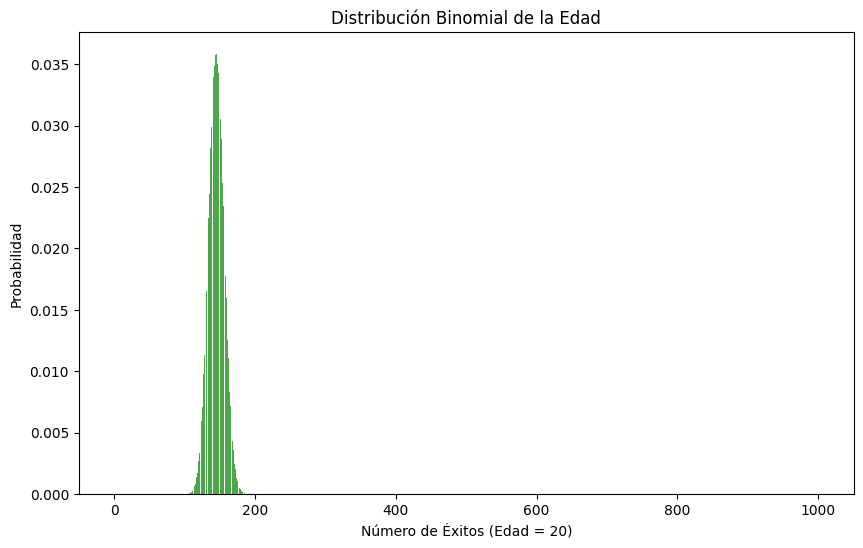

In [19]:
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Selecciona la columna 'age' para crear la distribución binomial
ages = df['age']

# Define el número de ensayos (lanzamientos de la moneda)
num_trials = len(ages)

# Calcula la probabilidad de obtener un 'éxito' (por ejemplo, una edad específica)
# Cambia el valor de 'success' según tus necesidades
success_value = 25
prob_success = sum(ages == success_value) / num_trials

# Crea la distribución binomial
dist_binomial = binom(n=num_trials, p=prob_success)

# Genera los valores para el gráfico de la distribución binomial
x = range(num_trials + 1)
pmf_values = dist_binomial.pmf(x)

plt.figure(figsize=(10, 6))

# Grafica la distribución binomial
plt.bar(x, pmf_values, align='center', alpha=0.7, color='green')
plt.title('Distribución Binomial de la Edad')
plt.xlabel('Número de Éxitos (Edad = 20)')
plt.ylabel('Probabilidad')
plt.show()


[MRDB]: Podríasis haber adaptado los márgenes

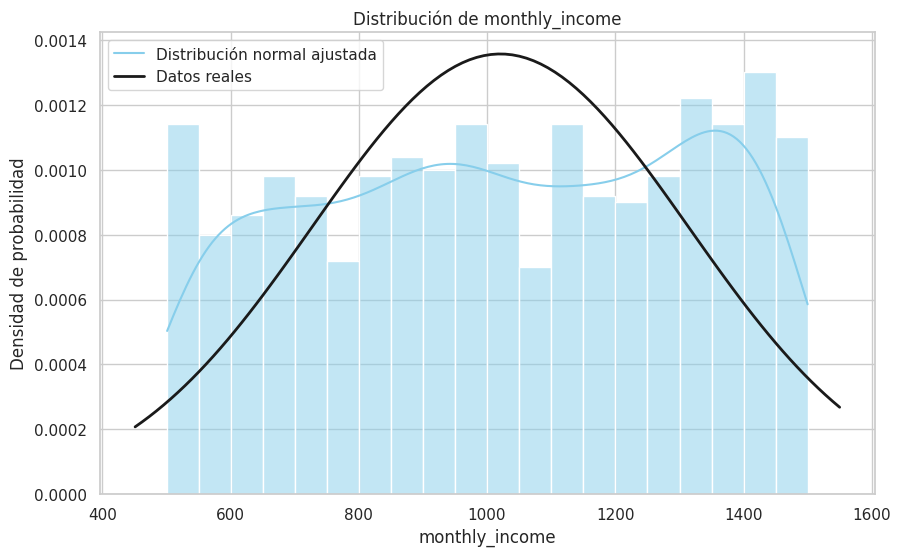

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# Reemplaza esto con tus datos reales
data = df.head(1000)

df = pd.DataFrame(data)

# Seleccionar la columna 'monthly_income'
columna_a_analizar = 'monthly_income'
datos_columna = df[columna_a_analizar]

# Calcular la función de densidad de probabilidad (PDF)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(datos_columna, kde=True, bins=20, color='skyblue', stat='density')

# Ajustar una distribución normal a los datos
media, desviacion_estandar = norm.fit(datos_columna)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desviacion_estandar)
plt.plot(x, p, 'k', linewidth=2)

# Personalizar el gráfico
plt.title(f'Distribución de {columna_a_analizar}')
plt.xlabel(columna_a_analizar)
plt.ylabel('Densidad de probabilidad')
plt.legend(['Distribución normal ajustada', 'Datos reales'])
plt.show()


**Funcion de densidad**

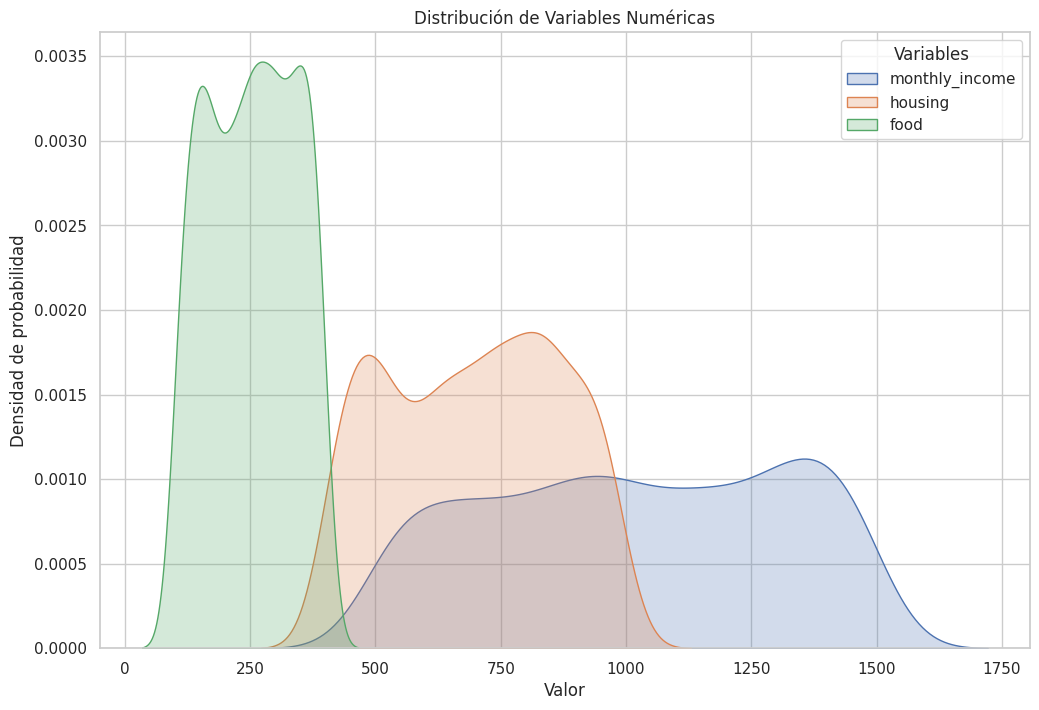

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Seleccionar las columnas numéricas para el gráfico de densidad
columnas_numericas = [ 'monthly_income', 'housing', 'food']

# Crear un gráfico de densidad
plt.figure(figsize=(12, 8))
for columna in columnas_numericas:
    sns.kdeplot(data=df[columna], fill=True, common_norm=False, label=columna, palette="husl")

# Personalizar el gráfico
plt.title('Distribución de Variables Numéricas')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend(title='Variables')

# Mostrar el gráfico
plt.show()

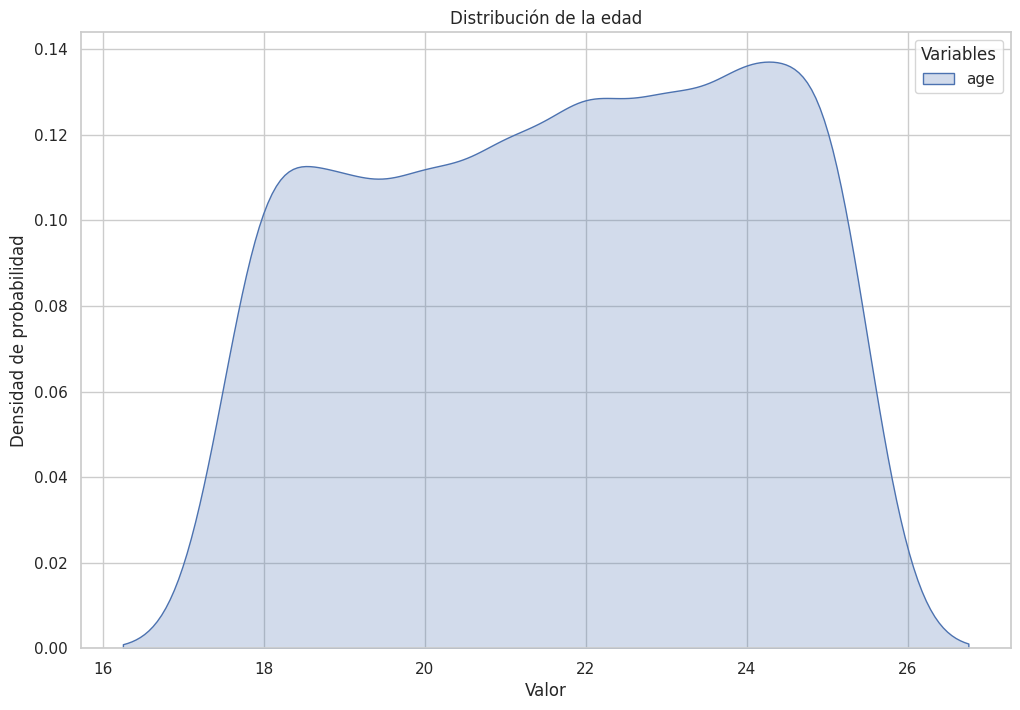

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")
# Seleccionar las columnas numéricas para el gráfico de densidad
columnas_numericas = [ 'age']
# Crear un gráfico de densidad
plt.figure(figsize=(12, 8))
for columna in columnas_numericas:
    sns.kdeplot(data=df[columna], fill=True, common_norm=False, label=columna, palette="husl")
# Personalizar el gráfico
plt.title('Distribución de la edad')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend(title='Variables')

# Mostrar el gráfico
plt.show()

**Otras pruebas**

- Prueba de Shapiro-Wilk
- Agostino-Pearson

Prueba de Shapiro-Wilk:
Estadístico de prueba: 0.9210644960403442
Valor p: 1.8868164457693413e-22
Los datos no parecen ser normales según la prueba de Shapiro-Wilk.

Prueba de D'Agostino-Pearson:
Estadístico de prueba: 1039.0077267708564
Valor p: 2.411786191372105e-226
Los datos no parecen ser normales según la prueba de D'Agostino-Pearson.


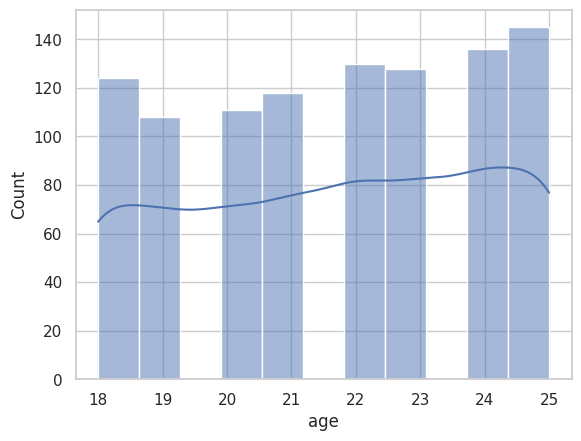

In [23]:
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro, normaltest

# Por ejemplo, para visualizar la distribución de la variable 'variable1'
sns.histplot(df['age'], kde=True)


# Prueba de Shapiro-Wilk
stat_sw, p_sw = shapiro(df['age'])
print('Prueba de Shapiro-Wilk:')
print('Estadístico de prueba:', stat_sw)
print('Valor p:', p_sw)
if p_sw > 0.05:
    print('Los datos parecen ser normales según la prueba de Shapiro-Wilk.')
else:
    print('Los datos no parecen ser normales según la prueba de Shapiro-Wilk.')

# Prueba de D'Agostino-Pearson (normaltest)
stat_dp, p_dp = normaltest(df['age'])
print('\nPrueba de D\'Agostino-Pearson:')
print('Estadístico de prueba:', stat_dp)
print('Valor p:', p_dp)
if p_dp > 0.05:
    print('Los datos parecen ser normales según la prueba de D\'Agostino-Pearson.')
else:
    print('Los datos no parecen ser normales según la prueba de D\'Agostino-Pearson.')


[MRDB]: En este apartado os ha faltado un poco de profundidad. Por qué no siguen una normal?

Como conclusión de este apartado hemos visto que en general nuestra variables no son normales. Nuestra meustra es muy pequeña, dado que solo tenemos 1000  las pruebas de normalidad pueden no ser concluyentes.

Por ejmplo, en el caso de la variable edad aunque la distribución de edades puede parecer uniforme, hay varios factores que podrían influir en la falta de normalidad de tus datos.

# 4. Estimación puntual e Intervalos de confianza


# 4.1 Estimación puntual

In [24]:
population_ages=df['age'].head(1000)
sample_ages=df['age'].head(500)

print(f'Media: {sample_ages.mean()}')

print (f'Defrencia entre medias: {population_ages.mean() - sample_ages.mean()}')

Media: 21.628
Defrencia entre medias: 0.0470000000000006


# 4.2 Intervalo de confianza para la **edad**

In [25]:
# Seleccionar las columnas numéricas para el gráfico de densidad
df['age'].describe()

count    1000.000000
mean       21.675000
std         2.322664
min        18.000000
25%        20.000000
50%        22.000000
75%        24.000000
max        25.000000
Name: age, dtype: float64

In [26]:
sample = df['age']
sample_size = 1000
sample_mean = sample.mean()
sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

stats.t.interval(confidence = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sample_stdev)             # Standard deviation estimate


(16.881256350232682, 26.46874364976732)

 Este intervalo indica que hay un 95% de probabilidad de que la verdadera media poblacional de las edades esté contenida dentro de este intervalo

[MRDB]: No es exactamente esta la definición de intervalo de confianza

Dado que la media muestral de las edades es 21 y esta media se encuentra dentro de este intervalo, no tenemos evidencia suficiente para rechazar la hipótesis de que la media poblacional sea diferente de 21.

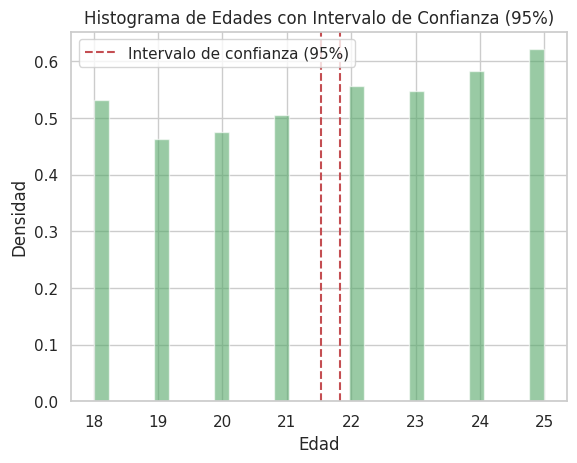

In [27]:
# Calcular los parámetros necesarios
sample = df['age']
sample_size = len(sample)
sample_mean = sample.mean()
sample_stdev = sample.std(ddof=1)

# Calcular el intervalo de confianza
confidence_level = 0.95
degrees_of_freedom = sample_size - 1
confidence_interval = stats.t.interval(confidence_level, df=degrees_of_freedom, loc=sample_mean, scale=sample_stdev / np.sqrt(sample_size))

# Graficar el histograma
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')

# Líneas para el intervalo de confianza
plt.axvline(x=confidence_interval[0], color='r', linestyle='--', label='Intervalo de confianza (95%)')
plt.axvline(x=confidence_interval[1], color='r', linestyle='--')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Histograma de Edades con Intervalo de Confianza (95%)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


[MRDB]: No entiendo muy  bien este gráfico. No os salía que el intervalo de confianza era de 16 a 26?

 Este intervalo muestra el rango dentro del cual es probable que se encuentre el verdadero valor medio de la población


# 4.3 Intervalo de confianza para la **ingresos mensuales**

In [28]:
df['monthly_income'].describe()

count    1000.000000
mean     1020.650000
std       293.841161
min       501.000000
25%       770.750000
50%      1021.000000
75%      1288.250000
max      1500.000000
Name: monthly_income, dtype: float64

In [29]:
sample = df['monthly_income']
sample_size = 1000
sample_mean = sample.mean()
sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

stats.t.interval(confidence = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sample_stdev)             # Standard deviation estimate


(414.1916496561944, 1627.1083503438056)

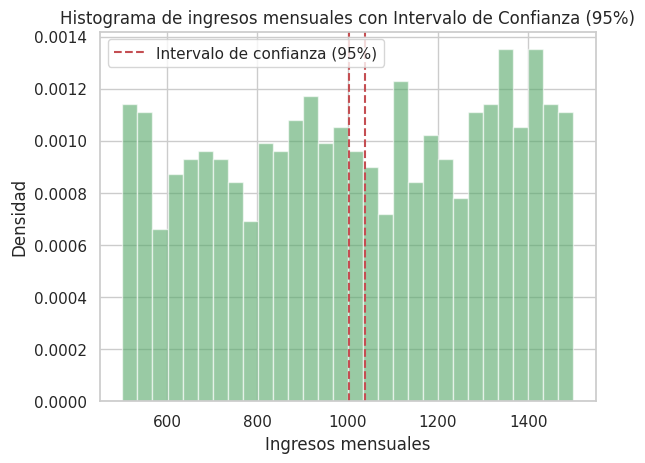

In [30]:
# Calcular los parámetros necesarios
sample = df['monthly_income']
sample_size = len(sample)
sample_mean = sample.mean()
sample_stdev = sample.std(ddof=1)

# Calcular el intervalo de confianza
confidence_level = 0.95
degrees_of_freedom = sample_size - 1
confidence_interval = stats.t.interval(confidence_level, df=degrees_of_freedom, loc=sample_mean, scale=sample_stdev / np.sqrt(sample_size))

# Graficar el histograma
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')

# Líneas para el intervalo de confianza
plt.axvline(x=confidence_interval[0], color='r', linestyle='--', label='Intervalo de confianza (95%)')
plt.axvline(x=confidence_interval[1], color='r', linestyle='--')

# Etiquetas y título
plt.xlabel('Ingresos mensuales')
plt.ylabel('Densidad')
plt.title('Histograma de ingresos mensuales con Intervalo de Confianza (95%)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

[MRDB]: Lo mismo de antes

# 5. Contrastes de hipótesis

***Hipotesis nula - Hipotesis alterantiva***

- Si no concuerdan rechazamos H0

[MRDB]: ?

**T test con una poblacion**

In [31]:
from scipy import stats

# Supongamos que queremos realizar el T-test en la columna 'age'
# y asumir una media poblacional de 30 años para compararla con la muestra

# Obtener la muestra de edades
muestra_edades = df['age']

# Especificar la media poblacional para comparar
media_poblacional = 21.675000

# Realizar el T-test
t_statistic, p_value = stats.ttest_1samp(muestra_edades, media_poblacional)

# Imprimir los resultados
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 0.0
P-Value: 1.0


In [32]:
muestra_junior = df[df['major'] == 'Economics']['tuition']

media_poblacional = 4520.395000

t_statistic, p_value = stats.ttest_1samp(muestra_junior, media_poblacional)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.264373802715841
P-Value: 0.7917601105624644


**T-test con dos muestras**


In [33]:
df['major'].unique()

array(['Psychology', 'Economics', 'Computer Science', 'Engineering',
       'Biology'], dtype=object)

In [34]:
df['year_in_school'].unique()

array(['Freshman', 'Junior', 'Senior', 'Sophomore'], dtype=object)

**EJEMPLO 1**

 Si hay una diferencia significativa entre las edades de los estudiantes de último año (Senior) y los estudiantes de tercer año (Junior) en tu conjunto de datos.

- Hipotesis0 : la edad de los junior es menor a la edad de los senior
- Hipotesis1 : la edad de los junior no es menor a la edad de los senior

In [35]:
np.random.seed(12)
ages1 = df[df['year_in_school'] == 'Junior']['age']
ages2 = df[df['year_in_school'] == 'Senior']['age']

wisconsin_ages = np.concatenate((ages1, ages2))

print( wisconsin_ages.mean() )

21.65069860279441


In [36]:
stats.ttest_ind(a= ages1,
                b= ages2,
                equal_var=False)    # Assume samples have equal variance?

#Si el valor p (p-value) obtenido en una prueba estadística resulta ser muy grande,
#esto generalmente indica que no hay suficiente evidencia para rechazar la hipótesis nula

TtestResult(statistic=0.5977626470181996, pvalue=0.5502695556926624, df=498.88573152415034)

Si el valor p es mayor que el nivel de significancia elegido, 0.05, entonces puedes concluir que **no** hay una diferencia significativa entre los grupos en términos de edad.

**EJEMPLO 2**

 Si hay una diferencia significativa en las edades entre estudiantes de tercer año (Junior) que estudian Psicología y estudiantes de tercer año que estudian Economía.

In [37]:

np.random.seed(12)
major1 = df[(df['major'] == 'Psychology')&(df['year_in_school'] == 'Junior')]['age']
major2 = df[(df['major'] == 'Economics')&(df['year_in_school'] == 'Junior')]['age']

wisconsin_ages_major = np.concatenate((major1, major2))

print( wisconsin_ages_major.mean() )

21.858695652173914


In [38]:
stats.ttest_ind(a= major1,
                b= major2,
                equal_var=False)

TtestResult(statistic=-1.3606135495119298, pvalue=0.177079014354298, df=88.80992397266063)

En términos prácticos, un valor p de 0.1 generalmente no se consideraría lo suficientemente bajo como para **rechazar** la hipótesis nula. Por lo tanto, en este caso, no tendriamos suficiente evidencia para afirmar que hay una diferencia significativa en las edades entre los estudiantes de Psicología y Economía.

**EJEMPLO 3**



Si hay una diferencia significativa entre los ingresos mensuales de los estudiantes de último Piscología y los estudiantes de Economia en tu conjunto de datos.


In [39]:
np.random.seed(12)
major1_income = df[df['major'] == 'Psychology']['monthly_income']
major2_income = df[df['major'] == 'Economics']['monthly_income']

wisconsin_income_major = np.concatenate((major1, major2))

print( wisconsin_income_major.mean() )

21.858695652173914


In [40]:
stats.ttest_ind(a= major1_income,
                b= major2_income,
                equal_var=False)

TtestResult(statistic=0.17334937131199224, pvalue=0.8624693132859389, df=379.2021437177456)

En términos prácticos, un valor p de 0.8 generalmente no se consideraría lo suficientemente bajo como para **rechazar** la hipótesis nula.

[MRDB]: Y qué significa esto?


# 6. ANOVA


A continuación comenzaremos un análisis ANOVA de nuestro dataset, esta la podemos definir como una herramienta estadística que se utiliza para comparar las medias de tres o más grupos y determinar si hay diferencias significativas entre ellos.

Para hacer esto debemos hacer unos análisis para ver si nuestros datos cumplen las variables de aplicabilidad del test ANOVA:

*   Poblaciones normalmente distribuidas en cada grupo.
*   Homocedasticidad de varianzas entre grupos.
*   Muestra aleatoria e independientes.



En este caso vamos a estudiar si existe diferencia significativa entre los grupos de "Year in school" en cuanto al gasto que tienen en sus casas y rentas, ya que lo lógico es que cuánto más tiempo pases en un barrio o zona, mejor la conozcas y puedas optar a mejores condiciones.

Cabe destacar que sabemos que la población estudiada cumple la condición de Muestras aleatorias e independientes, al haber estudiado el dataset anteriormente.

La tabla ANOVA muestra que hay diferencias estadísticamente significativas en la variable 'housing' entre los distintos años escolares

In [41]:
model = ols('housing ~ year_in_school', data=df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                      sum_sq     df         F    PR(>F)
year_in_school  3.000315e+05    3.0  3.436447  0.016469
Residual        2.898647e+07  996.0       NaN       NaN


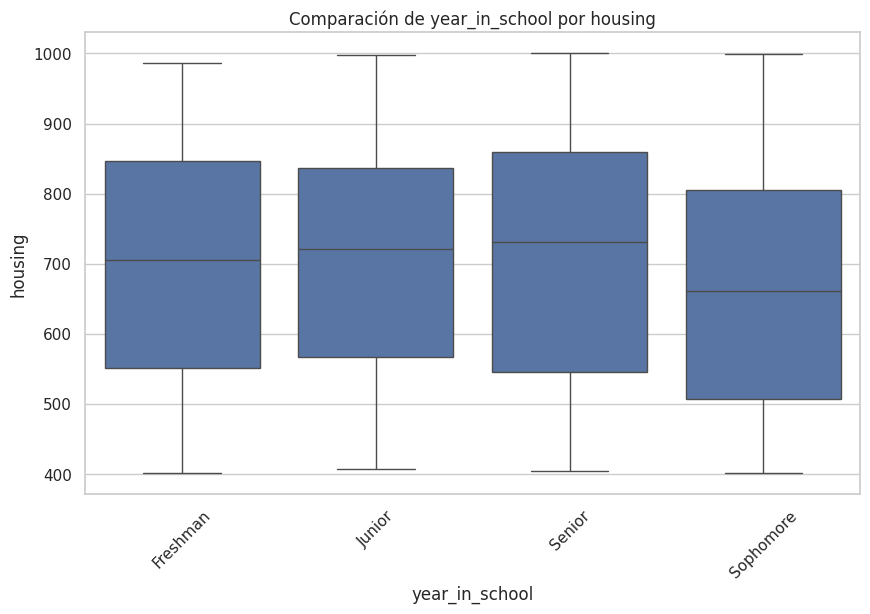

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year_in_school', y='housing', data=df)
plt.title('Comparación de year_in_school por housing')
plt.xlabel('year_in_school')
plt.ylabel('housing')
plt.xticks(rotation=45)
plt.show()


El Box PLot ilustra variaciones sutiles pero estadísticamente significativas en 'housing' entre los distintos años académicos, tal como lo confirma el análisis ANOVA. Aunque las diferencias no son visualmente marcadas, el resultado sugiere que el año académico influye en la variable 'housing', indicando que la experiencia de vivienda de los estudiantes varía de un año a otro, ya que como observamos se puede apreciar una tendencia positiva menos el último año que decae.

Podemos decir que la condición de homogeneidad de varianzas se cumplen.








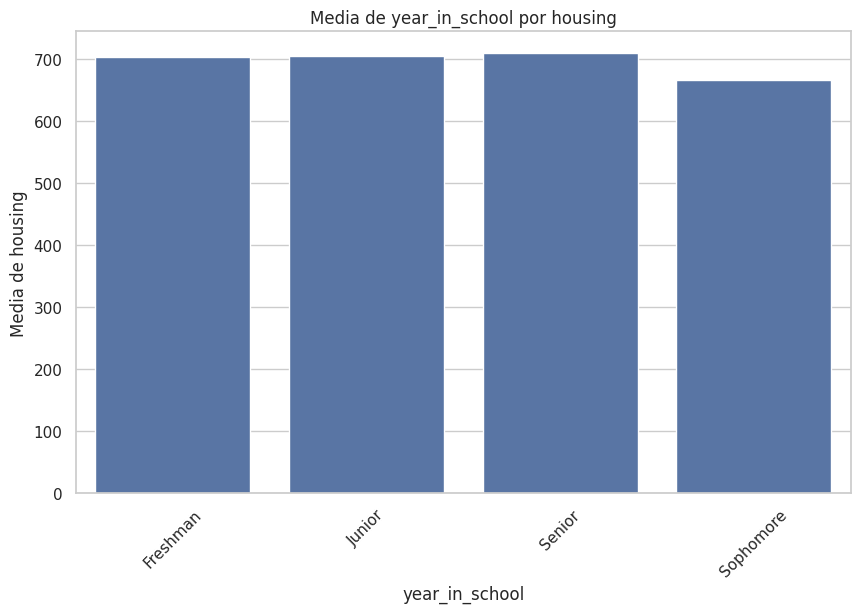

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year_in_school', y='housing', data=df, ci=None)
plt.title('Media de year_in_school por housing')
plt.xlabel('year_in_school')
plt.ylabel('Media de housing')
plt.xticks(rotation=45)
plt.show()

[MRDB]: No tengo claro que este gráfico ayude a las condiciones de aplicabilidad del ANOVA

 El gráfico respalda la idea de que la ANOVA es apropiada, al no mostrar variaciones extremas en las medias que podrían indicar violaciones de las suposiciones subyacentes como la homogeneidad de las varianzas o la normalidad de los datos.

 Gracias a estos dos gráficos podemos decir que se cumple que la Población está normalmente distribuida y que existe homocedasticidad entre grupos.



Continuaremos con un análisis Post-Hoc

In [44]:
education_levels = df['year_in_school'].unique()

for i, edu_level in enumerate(education_levels):
    print(f"Comparación de {edu_level} con los demás:")
    for j, other_edu_level in enumerate(education_levels):
        if j != i:
            print(f"  - vs {other_edu_level}:")
            t_statistic, p_value = stats.ttest_ind(df[df['year_in_school'] == edu_level]['housing'],
                                                   df[df['year_in_school'] == other_edu_level]['housing'])
            print("    T-Statistic:", t_statistic)
            print("    P-Value:", p_value)
    print()


Comparación de Freshman con los demás:
  - vs Junior:
    T-Statistic: -0.13905707627432976
    P-Value: 0.8894612617242742
  - vs Senior:
    T-Statistic: -0.37279972115696247
    P-Value: 0.7094539262226758
  - vs Sophomore:
    T-Statistic: 2.450477266866376
    P-Value: 0.014610348741932584

Comparación de Junior con los demás:
  - vs Freshman:
    T-Statistic: 0.13905707627432976
    P-Value: 0.8894612617242742
  - vs Senior:
    T-Statistic: -0.23968036605791376
    P-Value: 0.8106764767164703
  - vs Sophomore:
    T-Statistic: 2.6091223087904925
    P-Value: 0.009354373618642765

Comparación de Senior con los demás:
  - vs Freshman:
    T-Statistic: 0.37279972115696247
    P-Value: 0.7094539262226758
  - vs Junior:
    T-Statistic: 0.23968036605791376
    P-Value: 0.8106764767164703
  - vs Sophomore:
    T-Statistic: 2.765499094131058
    P-Value: 0.005894594140919786

Comparación de Sophomore con los demás:
  - vs Freshman:
    T-Statistic: -2.450477266866376
    P-Value: 0.014

Las comparaciones post-hoc entre los años académicos muestran que el grupo 'Sophomore' difiere significativamente de 'Freshman', 'Junior', y 'Senior' en la variable 'housing'. Los valores de p para estas comparaciones son menores que 0.05, lo que indica que las diferencias en 'housing' para 'Sophomore' son estadísticamente significativas en comparación con los otros tres años.

In [45]:
tukey = pairwise_tukeyhsd(endog=df['housing'],
                          groups=df['year_in_school'],
                          alpha=0.05)

tukey_summary = tukey.summary()
print(tukey_summary)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2  meandiff p-adj   lower    upper  reject
----------------------------------------------------------
Freshman    Junior   2.0781 0.9991 -37.1907 41.3468  False
Freshman    Senior   5.7433 0.9815 -33.2507 44.7372  False
Freshman Sophomore -37.3151 0.0699 -76.6242  1.9941  False
  Junior    Senior   3.6652 0.9951 -35.5654 42.8957  False
  Junior Sophomore -39.3931 0.0513 -78.9369  0.1507  False
  Senior Sophomore -43.0583 0.0251 -82.3293 -3.7874   True
----------------------------------------------------------


Si utilizasemos un algha de 0.05 veriamos que el análisis Tukey  indica que solo la diferencia en la media de 'housing' entre 'Senior' y 'Sophomore' es estadísticamente significativa, con un valor de p ajustado por debajo de 0.05 y, por tanto, se rechazaría solo la hipótesis nula de igualdad de medias para este par, pero si pintamos un gráfico con los resultados podremos ver que si que hay diferencias significativas.

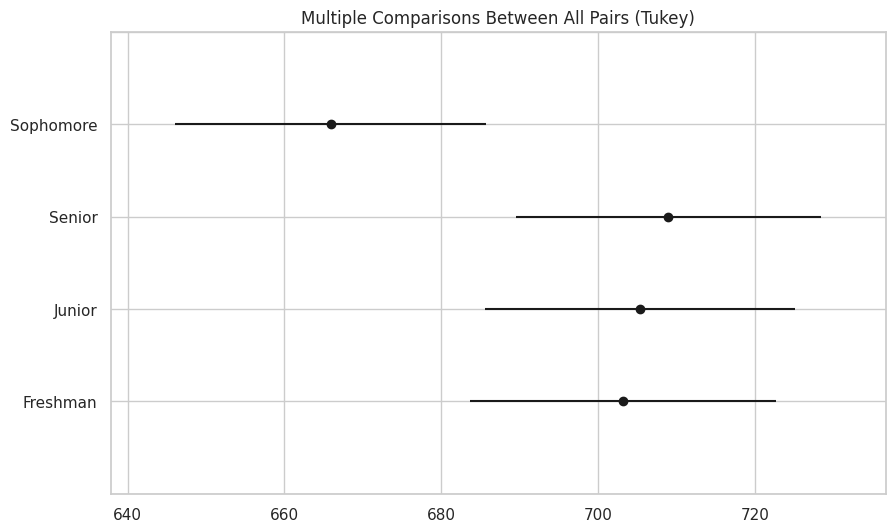

In [46]:
tukey.plot_simultaneous()
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5)


In [47]:
tukey = pairwise_tukeyhsd(endog=df['housing'],
                          groups=df['year_in_school'],
                          alpha=0.1)

tukey_summary = tukey.summary()
print(tukey_summary)


   Multiple Comparison of Means - Tukey HSD, FWER=0.10    
 group1    group2  meandiff p-adj   lower    upper  reject
----------------------------------------------------------
Freshman    Junior   2.0781 0.9991 -32.9328 37.0889  False
Freshman    Senior   5.7433 0.9815 -29.0226 40.5091  False
Freshman Sophomore -37.3151 0.0699 -72.3619 -2.2682   True
  Junior    Senior   3.6652 0.9951 -31.3116  38.642  False
  Junior Sophomore -39.3931 0.0513 -74.6492 -4.1371   True
  Senior Sophomore -43.0583 0.0251 -78.0711 -8.0455   True
----------------------------------------------------------


Como visualmente hemos visto que si hay diferencias significativas, con un nivel de significancia global ajustado al 10%, el análisis de Tukey muestra que hay diferencias estadísticamente significativas en la media de 'housing' entre el grupo 'Sophomore' y los otros tres años: 'Freshman', 'Junior', y 'Senior'. Se rechaza la hipótesis nula de igualdad de medias entre estos grupos, indicando que los 'Sophomores' tienen una media significativamente distinta en la variable 'housing'.

[MRDB]: Buenas conclusones del Post-hoc

[MRDB]: El trabajo está bien en líneas generales. Creo que hay algún comentario que os ha faltado y hay algunos gráfico o comentarios que no acabo de entender su utilidad. Nota: 7